# Making the GAN model pipeline from patch extraction

## Exploring the structure of the dataset

In [1]:
import pandas as pd
import numpy as np
import os
import sys
PROJECT_ROOT = os.path.dirname(os.getcwd())
sys.path.append(PROJECT_ROOT)


In [2]:
stages_path = os.path.join('..','data','stages.csv')
df_stages = pd.read_csv(stages_path)
df_stages.head()

,patient,stage,center
0,patient_000.zip,pN0,0
1,patient_000_node_0.tif,negative,0
2,patient_000_node_1.tif,negative,0
3,patient_000_node_2.tif,negative,0
4,patient_000_node_3.tif,negative,0


In [3]:
df_patients = df_stages[df_stages.patient.str.contains('.zip') == True].drop_duplicates(ignore_index=True)
df_patients

,patient,stage,center
0,patient_000.zip,pN0,0
1,patient_001.zip,pN0,0
2,patient_002.zip,pN0,0
3,patient_003.zip,pN0,0
4,patient_004.zip,pN0(i+),0
...,...,...,...
95,patient_095.zip,pN1,4
96,patient_096.zip,pN2,4
97,patient_097.zip,pN2,4
98,patient_098.zip,pN0,4


In [4]:
df_patients.groupby('stage')['patient'].agg('count')

stage
pN0        24
pN0(i+)    11
pN1        30
pN1mi      21
pN2        14
Name: patient, dtype: int64

In [5]:
df_patients.groupby('center')['patient'].agg('count')

center
0    20
1    20
2    20
3    20
4    20
Name: patient, dtype: int64

In [6]:
df_stages = df_stages[df_stages.patient.str.contains('.zip') == False].drop_duplicates(ignore_index=True)
df_stages.groupby('stage')['patient'].agg('count')

stage
itc          36
macro        87
micro        59
negative    318
Name: patient, dtype: int64

In [7]:
df_stages['tumor'] = np.where(df_stages['stage'] == 'negative', 0, 1)
df_stages.head()

,patient,stage,center,tumor
0,patient_000_node_0.tif,negative,0,0
1,patient_000_node_1.tif,negative,0,0
2,patient_000_node_2.tif,negative,0,0
3,patient_000_node_3.tif,negative,0,0
4,patient_000_node_4.tif,negative,0,0


In [8]:
df_stages.groupby('tumor')['patient'].agg('count')

tumor
0    318
1    182
Name: patient, dtype: int64

In [9]:
df_stages[['patient','tumor']].to_csv(os.path.join('..','data','tumor_images.csv'), index= False)
df_stages[['patient','tumor']].set_index('patient')['tumor'].to_json(os.path.join('..','data','tumor_images.json'), indent=1)

## Downloading the data from the S3 bucket

In [10]:
from utils.aws_handler import AWSHandler
from dotenv import load_dotenv

# Loading the AWS credentials
load_dotenv('../utils/aws_config.env')
AWS_ACCESS_KEY_ID = os.getenv('AWS_ACCESS_KEY_ID')
AWS_SECRET_KEY = os.getenv('AWS_SECRET_KEY') 
AWS_REGION = os.getenv('AWS_REGION')

#Defining the bucket to extract info
GOAL_BUCKET = 'camelyon-dataset'
GOAL_DATASET = 'CAMELYON17/'
GOAL_PATH  = os.path.join('..','data/')
STARTING_DOWNLOAD_IDX = 0
FILES_TO_DOWNLOAD = 10

aws_handler  = AWSHandler(AWS_ACCESS_KEY_ID, AWS_SECRET_KEY, AWS_REGION)
folders_utils = aws_handler.list_folders(GOAL_BUCKET)
del folders_utils[0]
folders_list = aws_handler.list_folders(GOAL_BUCKET, folders=True)
print(folders_list)

['CAMELYON17/annotations/', 'CAMELYON17/evaluation/', 'CAMELYON17/images/', 'CAMELYON17/masks/']


In [11]:
# Mapping files of each folder
annotations_list = aws_handler.list_folders(GOAL_BUCKET, folders_list[0])
evaluation_list = aws_handler.list_folders(GOAL_BUCKET, folders_list[1])
masks_list = aws_handler.list_folders(GOAL_BUCKET, folders_list[3])
# If you want to download all the files in the subfolder use commented line
# images_list = aws_handler.list_folders(GOAL_BUCKET,folders_list[2])
images_list = [[s.replace('masks', 'images').replace('_mask', ''), v] for s, v in masks_list]

In [ ]:
# Downloading utils files from dataset
aws_handler.download_list_file(folders_utils, GOAL_BUCKET, GOAL_PATH)


In [ ]:

# Downloading annotations from dataset
aws_handler.download_list_file(annotations_list, GOAL_BUCKET, GOAL_PATH, 'training/annotations/')


In [12]:

# Downloading masks from dataset
aws_handler.download_list_file(masks_list, GOAL_BUCKET, GOAL_PATH, 'training/masks/')


The file patient_000_node_4_mask.tif has been downloaded in ..\data/training/masks/patient_000_node_4_mask.tif succesfully.
The file patient_001_node_3_mask.tif has been downloaded in ..\data/training/masks/patient_001_node_3_mask.tif succesfully.
The file patient_003_node_1_mask.tif has been downloaded in ..\data/training/masks/patient_003_node_1_mask.tif succesfully.
The file patient_004_node_2_mask.tif has been downloaded in ..\data/training/masks/patient_004_node_2_mask.tif succesfully.
The file patient_004_node_4_mask.tif has been downloaded in ..\data/training/masks/patient_004_node_4_mask.tif succesfully.
The file patient_005_node_0_mask.tif has been downloaded in ..\data/training/masks/patient_005_node_0_mask.tif succesfully.
The file patient_006_node_0_mask.tif has been downloaded in ..\data/training/masks/patient_006_node_0_mask.tif succesfully.
The file patient_008_node_2_mask.tif has been downloaded in ..\data/training/masks/patient_008_node_2_mask.tif succesfully.
The file

In [ ]:

# Downloading evaulation scripts from bucket
aws_handler.download_list_file(evaluation_list, GOAL_BUCKET, GOAL_PATH, 'training/evaluation/')


In [12]:

# Downloading all images from dataset
aws_handler.download_list_file(images_list, GOAL_BUCKET, GOAL_PATH, 'training/images/', all_files= False)

The file patient_000_node_4.tif has been downloaded in src/data/training/images/patient_000_node_4.tif succesfully.
The file patient_001_node_3.tif has been downloaded in src/data/training/images/patient_001_node_3.tif succesfully.
The file patient_003_node_1.tif has been downloaded in src/data/training/images/patient_003_node_1.tif succesfully.
The file patient_004_node_2.tif has been downloaded in src/data/training/images/patient_004_node_2.tif succesfully.
The file patient_004_node_4.tif has been downloaded in src/data/training/images/patient_004_node_4.tif succesfully.
The file patient_005_node_0.tif has been downloaded in src/data/training/images/patient_005_node_0.tif succesfully.
The file patient_006_node_0.tif has been downloaded in src/data/training/images/patient_006_node_0.tif succesfully.
The file patient_008_node_2.tif has been downloaded in src/data/training/images/patient_008_node_2.tif succesfully.
The file patient_009_node_1.tif has been downloaded in src/data/training

## Patch extraction

In [97]:
import importlib
import utils.patch_generator as pass_patch_generator
importlib.reload(pass_patch_generator)

<module 'utils.patch_generator' from 'd:\\kuleuven\\thesis\\hist_image_kul_thesis\\src\\utils\\patch_generator.py'>

In [98]:
# Add ASAP to pythonpath
import sys
import json
asap_path = 'D:\\kuleuven\\thesis\\ASAP\\bin'
if asap_path not in sys.path:
    sys.path.append(asap_path)
print(sys.path)
from utils.patch_generator import PatchGenerator


['d:\\kuleuven\\thesis\\hist_image_kul_thesis\\src\\models', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\python39.zip', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\DLLs', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\lib', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu', '', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\lib\\site-packages', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\lib\\site-packages\\win32', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\lib\\site-packages\\win32\\lib', 'c:\\Users\\juans\\anaconda3\\envs\\thesis_env_cpu\\lib\\site-packages\\Pythonwin', 'd:\\kuleuven\\thesis\\hist_image_kul_thesis\\src', 'D:\\kuleuven\\thesis\\ASAP\\bin']


In [99]:
IMAGE_PATH = os.path.join('..', 'data', 'training', 'images')
ANNOTATION_PATH = os.path.join('..', 'data', 'training', 'annotations')
MASK_PATH = os.path.join('..', 'data', 'training', 'masks')
LABELS_PATH = os.path.join('..', 'data', 'tumor_images.json') # path with JSON telling if image is tumor or not

# Patch attributes
MAG_FACTOR = 256          # magnification factor
PATCHES_PER_BBOX = 20     # number of samples per bounding box
ADAPTIVE_QUANT = 0        # adapt number of samples based on box size
PATCH_SIZE = 256          # size of sampled patches
# % of patch that should be tumor (for tumor patches only)
TUMOR_THRESHOLD = 0.2

LOWER_BOUND = np.array([20, 20, 20])    # colors for thresholding tissue
UPPER_BOUND = np.array([200, 200, 200])

patcher = PatchGenerator(IMAGE_PATH, ANNOTATION_PATH, MASK_PATH, MAG_FACTOR, PATCHES_PER_BBOX,
                         PATCH_SIZE, TUMOR_THRESHOLD, ADAPTIVE_QUANT, LOWER_BOUND, UPPER_BOUND)

In [90]:
images_to_patch = [image for image in os.listdir(IMAGE_PATH) if os.path.isfile(os.path.join(IMAGE_PATH,image))]
with open(LABELS_PATH,'r') as f:
    images_labels = json.load(f)
for image in images_to_patch:
    print(f'Patching image {image}...')
    is_tumor = images_labels[image]

    # Loading the image and its downsampled version
    wsi_full_size, wsi_scaled = patcher.read_wsi(os.path.join(IMAGE_PATH, image))

    # Getting the contours of the wsi
    tissue_contours = patcher.get_contours(wsi_scaled, is_tumor)

    img_idx = image.split('.', 1)[0].split('_',1)[1]

    # Patching the image if its tumorous or not
    if bool(is_tumor):
        mask_full_size, mask_scaled = patcher.read_wsi(os.path.join(MASK_PATH, image.replace('.tif','_mask.tif')))
        tissue_contours = patcher.get_contours(mask_scaled, is_tumor)
        patcher.get_patches(wsi_full_size,is_tumor, img_idx, tissue_contours, mask_full_size)
    else:
        patcher.get_patches(wsi_full_size,is_tumor, img_idx, tissue_contours)

patient_000_node_4.tif
Saving patch 1 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_0.PNG.PNG succesfully.
Saving patch 2 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_1.PNG.PNG succesfully.
Saving patch 3 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_2.PNG.PNG succesfully.
Saving patch 4 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_3.PNG.PNG succesfully.
Saving patch 5 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_4.PNG.PNG succesfully.
Saving patch 6 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_5.PNG.PNG succesfully.
Saving patch 7 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_6.PNG.PNG succesfully.
Saving patch 8 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_7.PNG.PNG succesfully.
Saving patch 9 from 000_node_4 in ..\data\training\images\patches\normal\000_node_4_N_8.PNG.PNG succesful

OpenSlideError: TIFFRGBAImageGet failed

In [100]:
image = images_to_patch[8]
is_tumor = images_labels[image]

# Loading the image and its downsampled version
wsi_full_size, wsi_scaled = patcher.read_wsi(os.path.join(IMAGE_PATH, image))

# Getting the contours of the wsi
tissue_contours = patcher.get_contours(wsi_scaled, is_tumor)

img_idx = image.split('.', 1)[0].split('_',1)[1]

# Patching the image if its tumorous or not
if bool(is_tumor):
    mask_full_size, mask_scaled = patcher.read_wsi(os.path.join(MASK_PATH, image.replace('.tif','_mask.tif')))
    tissue_contours = patcher.get_contours(mask_scaled, is_tumor)
    patcher.get_patches(wsi_full_size,is_tumor, img_idx, tissue_contours, mask_full_size)
else:
    patcher.get_patches(wsi_full_size,is_tumor, img_idx, tissue_contours)


(1.0, 2.0000047488341615, 4.000028493275587, 8.000056986551174, 16.000787941088866, 32.005488258380176, 64.0217681853304, 128.08674673590687, 256.4245511935293)
256.4245511935293
(1.0, 2.0000047488341615, 4.000028493275587, 8.000056986551174, 16.000787941088866, 32.005488258380176, 64.0217681853304, 128.08674673590687, 256.4245511935293)
256.4245511935293


OpenSlideError: TIFFRGBAImageGet failed

In [91]:
print(os.path.join(MASK_PATH, image.replace('.tif','_mask.tif')))

..\data\training\masks\patient_004_node_4_mask.tif


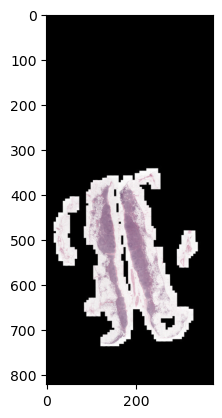

In [101]:
import matplotlib.pyplot as plt
plt.imshow(wsi_scaled)


In [55]:
contours = patcher.get_contours(wsi_scaled, is_tumor)
contours

(array([[[  0, 801]],
 
        [[  0, 806]],
 
        [[  3, 806]],
 
        [[  3, 801]]], dtype=int32),
 array([[[100, 305]],
 
        [[ 99, 306]],
 
        [[ 99, 318]],
 
        [[101, 318]],
 
        [[103, 320]],
 
        [[103, 329]],
 
        [[104, 329]],
 
        [[105, 330]],
 
        [[105, 342]],
 
        [[117, 342]],
 
        [[118, 343]],
 
        [[118, 349]],
 
        [[119, 349]],
 
        [[120, 350]],
 
        [[120, 351]],
 
        [[121, 352]],
 
        [[121, 353]],
 
        [[122, 353]],
 
        [[123, 354]],
 
        [[123, 359]],
 
        [[124, 359]],
 
        [[125, 360]],
 
        [[125, 361]],
 
        [[126, 362]],
 
        [[129, 362]],
 
        [[130, 363]],
 
        [[130, 365]],
 
        [[132, 367]],
 
        [[132, 370]],
 
        [[133, 371]],
 
        [[133, 372]],
 
        [[135, 374]],
 
        [[140, 374]],
 
        [[140, 361]],
 
        [[141, 360]],
 
        [[141, 348]],
 
        [[140, 347]],
 
   

In [56]:
tissue_contours = patcher.get_tissue_contours(wsi_scaled)
tissue_contours

(array([[[  0, 801]],
 
        [[  0, 806]],
 
        [[  3, 806]],
 
        [[  3, 801]]], dtype=int32),
 array([[[100, 305]],
 
        [[ 99, 306]],
 
        [[ 99, 318]],
 
        [[101, 318]],
 
        [[103, 320]],
 
        [[103, 329]],
 
        [[104, 329]],
 
        [[105, 330]],
 
        [[105, 342]],
 
        [[117, 342]],
 
        [[118, 343]],
 
        [[118, 349]],
 
        [[119, 349]],
 
        [[120, 350]],
 
        [[120, 351]],
 
        [[121, 352]],
 
        [[121, 353]],
 
        [[122, 353]],
 
        [[123, 354]],
 
        [[123, 359]],
 
        [[124, 359]],
 
        [[125, 360]],
 
        [[125, 361]],
 
        [[126, 362]],
 
        [[129, 362]],
 
        [[130, 363]],
 
        [[130, 365]],
 
        [[132, 367]],
 
        [[132, 370]],
 
        [[133, 371]],
 
        [[133, 372]],
 
        [[135, 374]],
 
        [[140, 374]],
 
        [[140, 361]],
 
        [[141, 360]],
 
        [[141, 348]],
 
        [[140, 347]],
 
   

In [18]:
print(os.path.join(IMAGE_PATH, image))
print(patcher.mag_factor)

..\data\training\images\patient_000_node_4.tif
256


## Model design and feature learning

## Model performance